In [1]:
!git clone https://github.com/BNUCNL/dnnbrain.git

Cloning into 'dnnbrain'...
remote: Enumerating objects: 5558, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 5558 (delta 55), reused 73 (delta 34), pack-reused 5433
Receiving objects: 100% (5558/5558), 9.85 MiB | 17.69 MiB/s, done.
Resolving deltas: 100% (3580/3580), done.


In [2]:
%cd dnnbrain

/content/dnnbrain


In [3]:
!python setup.py install

/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:484: UserWarning: Normalizing '1.0a' to '1.0a0'
  warnings.warn(tmpl.format(**locals()))
running install
running bdist_egg
running egg_info
creating dnnbrain.egg-info
writing dnnbrain.egg-info/PKG-INFO
writing dependency_links to dnnbrain.egg-info/dependency_links.txt
writing top-level names to dnnbrain.egg-info/top_level.txt
writing manifest file 'dnnbrain.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'dnnbrain.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/dnnbrain
copying dnnbrain/__init__.py -> build/lib/dnnbrain
creating build/lib/dnnbrain/dnn
copying dnnbrain/dnn/base.py -> build/lib/dnnbrain/dnn
copying dnnbrain/dnn/models.py -> build/lib/dnnbrain/dnn
copying dnnbrain/dnn/core.py -> build/lib/dnnbrain/dnn
copying dnnbrain/dnn/__init__.py -> build/lib/dnnbrain/dnn
copying dnnb

In [4]:
!pip install nipy
!pip install cifti

     |████████████████████████████████| 2.3 MB 10.5 MB/s 


In [5]:
import os
os.environ['DNNBRAIN_DATA'] = os.path.abspath('data');
os.environ['PATH'] = os.path.abspath('bin') + ":" + os.getenv('PATH');
os.environ['PYTHONPATH'] = os.path.abspath('.') + ":" + os.getenv('PYTHONPATH');
print(os.environ['DNNBRAIN_DATA'])
print(os.environ['PATH'])
print(os.environ['PYTHONPATH'])

/content/dnnbrain/data
/content/dnnbrain/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin
/content/dnnbrain:/env/python


In [6]:
!mkdir data
%cd data
!mkdir models

/content/dnnbrain/data


In [7]:
import requests
#alexnet parameters
url = "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth"
r = requests.get(url, allow_redirects=True)
models_path = os.path.abspath('models/alexnet.pth')
open(models_path, 'wb').write(r.content)

244418560

In [8]:
#downloading the presented stimuli images
url = "https://osf.io/hy5m7/download"
r = requests.get(url, allow_redirects=True)
pt = os.path.abspath('presented_stimuli.tar.gz')
open(pt, 'wb').write(r.content)

340442148

In [9]:
!tar -xvzf presented_stimuli.tar.gz

Presented_Stimuli/
Presented_Stimuli/ImageNet/
Presented_Stimuli/ImageNet/n02834397_15612.JPEG
Presented_Stimuli/ImageNet/n04099969_3551.JPEG
Presented_Stimuli/ImageNet/n02276258_5118.JPEG
Presented_Stimuli/ImageNet/n02981792_3265.JPEG
Presented_Stimuli/ImageNet/n02843684_21806.JPEG
Presented_Stimuli/ImageNet/n04399382_2877.JPEG
Presented_Stimuli/ImageNet/n02797295_13746.JPEG
Presented_Stimuli/ImageNet/n04243546_5419.JPEG
Presented_Stimuli/ImageNet/n02113799_8764.JPEG
Presented_Stimuli/ImageNet/n02087046_4402.JPEG
Presented_Stimuli/ImageNet/n02097474_11481.JPEG
Presented_Stimuli/ImageNet/n04275548_4656.JPEG
Presented_Stimuli/ImageNet/n03445924_6637.JPEG
Presented_Stimuli/ImageNet/n03944341_8299.JPEG
Presented_Stimuli/ImageNet/n03776460_19270.JPEG
Presented_Stimuli/ImageNet/n04204238_15792.JPEG
Presented_Stimuli/ImageNet/n04356056_8602.JPEG
Presented_Stimuli/ImageNet/n01601694_8281.JPEG
Presented_Stimuli/ImageNet/n03017168_3695.JPEG
Presented_Stimuli/ImageNet/n03991062_92.JPEG
Presented

In [10]:
%cd /content/dnnbrain
!mkdir tutorial
%cd tutorial
!mkdir scan_dnn    
!mkdir probe_dnn
!mkdir visualize_dnn
!mkdir saliency_maps
!mkdir colors

/content/dnnbrain
/content/dnnbrain/tutorial


In [11]:
!cp -RT /content/dnnbrain/dnnbrain /content/dnnbrain

In [12]:
import cv2
import numpy as np
from dnnbrain.utils.plot import imgarray_show

def create_blank(width, height, rgb_color=(0, 0, 0)):
    """Create new image(numpy array) filled with certain color in RGB"""
    # Create black blank image
    image = np.zeros((height, width, 3), np.uint8)

    # Since OpenCV uses BGR, convert the color first
    color = tuple(reversed(rgb_color))
    # Fill image with color
    image[:] = color

    return image

# Create new blank 375x375 red image
width, height = 375, 375
color_list = ["black", "white", "red", "green", "blue", "yellow", "pink", "cyan", "orange", "violet"]
color_list_rgb = [(0,0,0), (255,255,255), (255,0,0), (0,255,0), (0,0,255), (255,255,0), (255,0,255), (0,255,255), (255,102,0), (128,0,128)]
img_arrs = []
for idx, color in enumerate(color_list):
  image = create_blank(width, height, rgb_color=color_list_rgb[idx])
  # cv2_imshow(image)
  img_arrs.append(image)
  cv2.imwrite("/content/dnnbrain/tutorial/colors/" + color + ".jpg", image)

In [13]:
%cd /content/dnnbrain
!rm -r brain dnn io utils viz __init__.py

/content/dnnbrain


In [ ]:
%cd /content/dnnbrain/tutorial/scan_dnn    
#upload the "examples.stim.csv" file from PC

/content/dnnbrain/tutorial/scan_dnn


In [ ]:
!echo -e "type=image" > examples.stim.csv
!echo -e "path=/content/dnnbrain/data/Presented_Stimuli/ImageNet" >> examples.stim.csv
!echo -e "data=stimID" >> examples.stim.csv
!echo -e "n02130308_9559.JPEG" >> examples.stim.csv
!echo -e "n03255030_4054.JPEG" >> examples.stim.csv
!echo -e "n01614925_407.JPEG" >> examples.stim.csv


In [ ]:
!pwd

/content/dnnbrain/tutorial/scan_dnn


In [ ]:
%cd /content/dnnbrain/tutorial/scan_dnn

/content/dnnbrain/tutorial/scan_dnn


In [ ]:
!dnn_act -net AlexNet -layer conv1_relu conv2_relu conv3_relu conv4_relu conv5_relu -stim examples.stim.csv -cuda -out AlexNet_relu.act.h5

Extracted activation of conv1_relu: 3/3
Extracted activation of conv2_relu: 3/3
Extracted activation of conv3_relu: 3/3
Extracted activation of conv4_relu: 3/3
Extracted activation of conv5_relu: 3/3


In [ ]:
!cp -RT /content/dnnbrain/dnnbrain /content/dnnbrain

maximal channel indices:
 [[ 52 154 216  56  77]
 [  8 129 233  19  26]
 [ 40 134  30 254 133]]


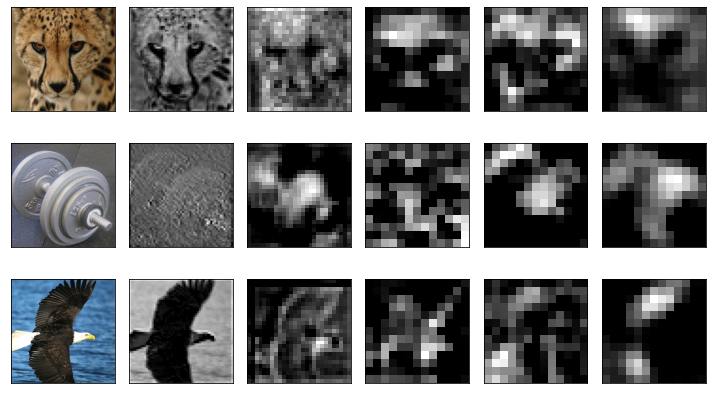

In [ ]:
import numpy as np

from os.path import join as pjoin

from matplotlib import pyplot as plt
from dnnbrain.dnn.core import Activation, Stimulus
from dnnbrain.utils.plot import imgarray_show

# initialize an array to save maximal channel indices
n_img = 3  # the number of example images
n_layer = 5  # the number of Conv layers
max_chn_indices = np.zeros((n_img, n_layer), np.int)

# load feature maps
activ = Activation()
activ.load('AlexNet_relu.act.h5')

# find maximal channel indices for each layer
activ_pool = activ.pool('mean')  # calculate mean value of each channel
for idx, layer in enumerate(activ_pool.layers):
    data = activ_pool.get(layer).squeeze()
    max_chn_indices[:, idx] = np.argmax(data, 1)
print('maximal channel indices:\n', max_chn_indices)

# load stimulus information
stim = Stimulus()
stim.load('examples.stim.csv')

# plot original images and feature maps
img_arrs = []
for idx, row in enumerate(max_chn_indices):
    ori_file = pjoin(stim.header['path'], stim.get('stimID')[idx])  # get path of the original file
    img_arrs.append(plt.imread(ori_file))
    for lyr_idx, max_chn_idx in enumerate(row):
        layer = activ.layers[lyr_idx]
        img_arrs.append(activ.get(layer)[idx, max_chn_idx])
imgarray_show(img_arrs, nrows=n_img, ncols=n_layer+1, cmap='gray')

In [ ]:
%cd /content/dnnbrain
!rm -r brain dnn io utils viz __init__.py

/content/dnnbrain


In [11]:
## Probe_CNN ##

In [ ]:
%cd /content/dnnbrain/tutorial/probe_dnn
#upload the "all_5000scenes.stim.csv" file from PC

/content/dnnbrain/tutorial/probe_dnn


In [ ]:
# Big layers so download one by one
#!dnn_act -net AlexNet -layer conv1 conv2 conv3 conv4 conv5 fc1 fc2 -stim all_5000scenes.stim.csv -out AlexNet.act.h5 -cuda
#!dnn_act -net AlexNet -layer conv1_relu conv2_relu conv3_relu conv4_relu conv5_relu fc1_relu fc2_relu -stim all_5000scenes.stim.csv -out AlexNet_relu.act.h5 -cuda

In [ ]:
!dnn_act -net AlexNet -layer conv1 -stim all_5000scenes.stim.csv -out AlexNet1.act.h5 -cuda

Extracted activation of conv1: 8/4916
Extracted activation of conv1: 16/4916
Extracted activation of conv1: 24/4916
Extracted activation of conv1: 32/4916
Extracted activation of conv1: 40/4916
Extracted activation of conv1: 48/4916
Extracted activation of conv1: 56/4916
Extracted activation of conv1: 64/4916
Extracted activation of conv1: 72/4916
Extracted activation of conv1: 80/4916
Extracted activation of conv1: 88/4916
Extracted activation of conv1: 96/4916
Extracted activation of conv1: 104/4916
Extracted activation of conv1: 112/4916
Extracted activation of conv1: 120/4916
Extracted activation of conv1: 128/4916
Extracted activation of conv1: 136/4916
Extracted activation of conv1: 144/4916
Extracted activation of conv1: 152/4916
Extracted activation of conv1: 160/4916
Extracted activation of conv1: 168/4916
Extracted activation of conv1: 176/4916
Extracted activation of conv1: 184/4916
Extracted activation of conv1: 192/4916
Extracted activation of conv1: 200/4916
Extracted act

In [ ]:
!dnn_act -net AlexNet -layer conv2 -stim all_5000scenes.stim.csv -out AlexNet2.act.h5 -cuda

Extracted activation of conv2: 8/4916
Extracted activation of conv2: 16/4916
Extracted activation of conv2: 24/4916
Extracted activation of conv2: 32/4916
Extracted activation of conv2: 40/4916
Extracted activation of conv2: 48/4916
Extracted activation of conv2: 56/4916
Extracted activation of conv2: 64/4916
Extracted activation of conv2: 72/4916
Extracted activation of conv2: 80/4916
Extracted activation of conv2: 88/4916
Extracted activation of conv2: 96/4916
Extracted activation of conv2: 104/4916
Extracted activation of conv2: 112/4916
Extracted activation of conv2: 120/4916
Extracted activation of conv2: 128/4916
Extracted activation of conv2: 136/4916
Extracted activation of conv2: 144/4916
Extracted activation of conv2: 152/4916
Extracted activation of conv2: 160/4916
Extracted activation of conv2: 168/4916
Extracted activation of conv2: 176/4916
Extracted activation of conv2: 184/4916
Extracted activation of conv2: 192/4916
Extracted activation of conv2: 200/4916
Extracted act

In [ ]:
!dnn_act -net AlexNet -layer conv3 -stim all_5000scenes.stim.csv -out AlexNet3.act.h5 -cuda

Extracted activation of conv3: 8/4916
Extracted activation of conv3: 16/4916
Extracted activation of conv3: 24/4916
Extracted activation of conv3: 32/4916
Extracted activation of conv3: 40/4916
Extracted activation of conv3: 48/4916
Extracted activation of conv3: 56/4916
Extracted activation of conv3: 64/4916
Extracted activation of conv3: 72/4916
Extracted activation of conv3: 80/4916
Extracted activation of conv3: 88/4916
Extracted activation of conv3: 96/4916
Extracted activation of conv3: 104/4916
Extracted activation of conv3: 112/4916
Extracted activation of conv3: 120/4916
Extracted activation of conv3: 128/4916
Extracted activation of conv3: 136/4916
Extracted activation of conv3: 144/4916
Extracted activation of conv3: 152/4916
Extracted activation of conv3: 160/4916
Extracted activation of conv3: 168/4916
Extracted activation of conv3: 176/4916
Extracted activation of conv3: 184/4916
Extracted activation of conv3: 192/4916
Extracted activation of conv3: 200/4916
Extracted act

In [ ]:
!dnn_act -net AlexNet -layer conv4 -stim all_5000scenes.stim.csv -out AlexNet4.act.h5 -cuda

Extracted activation of conv4: 8/4916
Extracted activation of conv4: 16/4916
Extracted activation of conv4: 24/4916
Extracted activation of conv4: 32/4916
Extracted activation of conv4: 40/4916
Extracted activation of conv4: 48/4916
Extracted activation of conv4: 56/4916
Extracted activation of conv4: 64/4916
Extracted activation of conv4: 72/4916
Extracted activation of conv4: 80/4916
Extracted activation of conv4: 88/4916
Extracted activation of conv4: 96/4916
Extracted activation of conv4: 104/4916
Extracted activation of conv4: 112/4916
Extracted activation of conv4: 120/4916
Extracted activation of conv4: 128/4916
Extracted activation of conv4: 136/4916
Extracted activation of conv4: 144/4916
Extracted activation of conv4: 152/4916
Extracted activation of conv4: 160/4916
Extracted activation of conv4: 168/4916
Extracted activation of conv4: 176/4916
Extracted activation of conv4: 184/4916
Extracted activation of conv4: 192/4916
Extracted activation of conv4: 200/4916
Extracted act

In [ ]:
!dnn_act -net AlexNet -layer conv5 -stim all_5000scenes.stim.csv -out AlexNet5.act.h5 -cuda

Extracted activation of conv5: 8/4916
Extracted activation of conv5: 16/4916
Extracted activation of conv5: 24/4916
Extracted activation of conv5: 32/4916
Extracted activation of conv5: 40/4916
Extracted activation of conv5: 48/4916
Extracted activation of conv5: 56/4916
Extracted activation of conv5: 64/4916
Extracted activation of conv5: 72/4916
Extracted activation of conv5: 80/4916
Extracted activation of conv5: 88/4916
Extracted activation of conv5: 96/4916
Extracted activation of conv5: 104/4916
Extracted activation of conv5: 112/4916
Extracted activation of conv5: 120/4916
Extracted activation of conv5: 128/4916
Extracted activation of conv5: 136/4916
Extracted activation of conv5: 144/4916
Extracted activation of conv5: 152/4916
Extracted activation of conv5: 160/4916
Extracted activation of conv5: 168/4916
Extracted activation of conv5: 176/4916
Extracted activation of conv5: 184/4916
Extracted activation of conv5: 192/4916
Extracted activation of conv5: 200/4916
Extracted act

In [ ]:
!dnn_act -net AlexNet -layer fc1 -stim all_5000scenes.stim.csv -out AlexNet6.act.h5 -cuda

Extracted activation of fc1: 8/4916
Extracted activation of fc1: 16/4916
Extracted activation of fc1: 24/4916
Extracted activation of fc1: 32/4916
Extracted activation of fc1: 40/4916
Extracted activation of fc1: 48/4916
Extracted activation of fc1: 56/4916
Extracted activation of fc1: 64/4916
Extracted activation of fc1: 72/4916
Extracted activation of fc1: 80/4916
Extracted activation of fc1: 88/4916
Extracted activation of fc1: 96/4916
Extracted activation of fc1: 104/4916
Extracted activation of fc1: 112/4916
Extracted activation of fc1: 120/4916
Extracted activation of fc1: 128/4916
Extracted activation of fc1: 136/4916
Extracted activation of fc1: 144/4916
Extracted activation of fc1: 152/4916
Extracted activation of fc1: 160/4916
Extracted activation of fc1: 168/4916
Extracted activation of fc1: 176/4916
Extracted activation of fc1: 184/4916
Extracted activation of fc1: 192/4916
Extracted activation of fc1: 200/4916
Extracted activation of fc1: 208/4916
Extracted activation of f

In [ ]:
!dnn_act -net AlexNet -layer fc2 -stim all_5000scenes.stim.csv -out AlexNet7.act.h5 -cuda

Extracted activation of fc2: 8/4916
Extracted activation of fc2: 16/4916
Extracted activation of fc2: 24/4916
Extracted activation of fc2: 32/4916
Extracted activation of fc2: 40/4916
Extracted activation of fc2: 48/4916
Extracted activation of fc2: 56/4916
Extracted activation of fc2: 64/4916
Extracted activation of fc2: 72/4916
Extracted activation of fc2: 80/4916
Extracted activation of fc2: 88/4916
Extracted activation of fc2: 96/4916
Extracted activation of fc2: 104/4916
Extracted activation of fc2: 112/4916
Extracted activation of fc2: 120/4916
Extracted activation of fc2: 128/4916
Extracted activation of fc2: 136/4916
Extracted activation of fc2: 144/4916
Extracted activation of fc2: 152/4916
Extracted activation of fc2: 160/4916
Extracted activation of fc2: 168/4916
Extracted activation of fc2: 176/4916
Extracted activation of fc2: 184/4916
Extracted activation of fc2: 192/4916
Extracted activation of fc2: 200/4916
Extracted activation of fc2: 208/4916
Extracted activation of f

In [ ]:
!dnn_act -net AlexNet -layer conv1_relu -stim all_5000scenes.stim.csv -out AlexNet_relu1.act.h5 -cuda

Extracted activation of conv1_relu: 8/4916
Extracted activation of conv1_relu: 16/4916
Extracted activation of conv1_relu: 24/4916
Extracted activation of conv1_relu: 32/4916
Extracted activation of conv1_relu: 40/4916
Extracted activation of conv1_relu: 48/4916
Extracted activation of conv1_relu: 56/4916
Extracted activation of conv1_relu: 64/4916
Extracted activation of conv1_relu: 72/4916
Extracted activation of conv1_relu: 80/4916
Extracted activation of conv1_relu: 88/4916
Extracted activation of conv1_relu: 96/4916
Extracted activation of conv1_relu: 104/4916
Extracted activation of conv1_relu: 112/4916
Extracted activation of conv1_relu: 120/4916
Extracted activation of conv1_relu: 128/4916
Extracted activation of conv1_relu: 136/4916
Extracted activation of conv1_relu: 144/4916
Extracted activation of conv1_relu: 152/4916
Extracted activation of conv1_relu: 160/4916
Extracted activation of conv1_relu: 168/4916
Extracted activation of conv1_relu: 176/4916
Extracted activation of

In [ ]:
!dnn_act -net AlexNet -layer conv2_relu -stim all_5000scenes.stim.csv -out AlexNet_relu2.act.h5 -cuda

Extracted activation of conv2_relu: 8/4916
Extracted activation of conv2_relu: 16/4916
Extracted activation of conv2_relu: 24/4916
Extracted activation of conv2_relu: 32/4916
Extracted activation of conv2_relu: 40/4916
Extracted activation of conv2_relu: 48/4916
Extracted activation of conv2_relu: 56/4916
Extracted activation of conv2_relu: 64/4916
Extracted activation of conv2_relu: 72/4916
Extracted activation of conv2_relu: 80/4916
Extracted activation of conv2_relu: 88/4916
Extracted activation of conv2_relu: 96/4916
Extracted activation of conv2_relu: 104/4916
Extracted activation of conv2_relu: 112/4916
Extracted activation of conv2_relu: 120/4916
Extracted activation of conv2_relu: 128/4916
Extracted activation of conv2_relu: 136/4916
Extracted activation of conv2_relu: 144/4916
Extracted activation of conv2_relu: 152/4916
Extracted activation of conv2_relu: 160/4916
Extracted activation of conv2_relu: 168/4916
Extracted activation of conv2_relu: 176/4916
Extracted activation of

In [ ]:
!dnn_act -net AlexNet -layer conv3_relu -stim all_5000scenes.stim.csv -out AlexNet_relu3.act.h5 -cuda

Extracted activation of conv3_relu: 8/4916
Extracted activation of conv3_relu: 16/4916
Extracted activation of conv3_relu: 24/4916
Extracted activation of conv3_relu: 32/4916
Extracted activation of conv3_relu: 40/4916
Extracted activation of conv3_relu: 48/4916
Extracted activation of conv3_relu: 56/4916
Extracted activation of conv3_relu: 64/4916
Extracted activation of conv3_relu: 72/4916
Extracted activation of conv3_relu: 80/4916
Extracted activation of conv3_relu: 88/4916
Extracted activation of conv3_relu: 96/4916
Extracted activation of conv3_relu: 104/4916
Extracted activation of conv3_relu: 112/4916
Extracted activation of conv3_relu: 120/4916
Extracted activation of conv3_relu: 128/4916
Extracted activation of conv3_relu: 136/4916
Extracted activation of conv3_relu: 144/4916
Extracted activation of conv3_relu: 152/4916
Extracted activation of conv3_relu: 160/4916
Extracted activation of conv3_relu: 168/4916
Extracted activation of conv3_relu: 176/4916
Extracted activation of

In [ ]:
!dnn_act -net AlexNet -layer conv4_relu -stim all_5000scenes.stim.csv -out AlexNet_relu4.act.h5 -cuda

Extracted activation of conv4_relu: 8/4916
Extracted activation of conv4_relu: 16/4916
Extracted activation of conv4_relu: 24/4916
Extracted activation of conv4_relu: 32/4916
Extracted activation of conv4_relu: 40/4916
Extracted activation of conv4_relu: 48/4916
Extracted activation of conv4_relu: 56/4916
Extracted activation of conv4_relu: 64/4916
Extracted activation of conv4_relu: 72/4916
Extracted activation of conv4_relu: 80/4916
Extracted activation of conv4_relu: 88/4916
Extracted activation of conv4_relu: 96/4916
Extracted activation of conv4_relu: 104/4916
Extracted activation of conv4_relu: 112/4916
Extracted activation of conv4_relu: 120/4916
Extracted activation of conv4_relu: 128/4916
Extracted activation of conv4_relu: 136/4916
Extracted activation of conv4_relu: 144/4916
Extracted activation of conv4_relu: 152/4916
Extracted activation of conv4_relu: 160/4916
Extracted activation of conv4_relu: 168/4916
Extracted activation of conv4_relu: 176/4916
Extracted activation of

In [ ]:
!dnn_act -net AlexNet -layer fc1_relu -stim all_5000scenes.stim.csv -out AlexNet_relu6.act.h5 -cuda

Extracted activation of fc1_relu: 8/4916
Extracted activation of fc1_relu: 16/4916
Extracted activation of fc1_relu: 24/4916
Extracted activation of fc1_relu: 32/4916
Extracted activation of fc1_relu: 40/4916
Extracted activation of fc1_relu: 48/4916
Extracted activation of fc1_relu: 56/4916
Extracted activation of fc1_relu: 64/4916
Extracted activation of fc1_relu: 72/4916
Extracted activation of fc1_relu: 80/4916
Extracted activation of fc1_relu: 88/4916
Extracted activation of fc1_relu: 96/4916
Extracted activation of fc1_relu: 104/4916
Extracted activation of fc1_relu: 112/4916
Extracted activation of fc1_relu: 120/4916
Extracted activation of fc1_relu: 128/4916
Extracted activation of fc1_relu: 136/4916
Extracted activation of fc1_relu: 144/4916
Extracted activation of fc1_relu: 152/4916
Extracted activation of fc1_relu: 160/4916
Extracted activation of fc1_relu: 168/4916
Extracted activation of fc1_relu: 176/4916
Extracted activation of fc1_relu: 184/4916
Extracted activation of 

In [ ]:
!dnn_act -net AlexNet -layer conv5_relu -stim all_5000scenes.stim.csv -out AlexNet_relu5.act.h5 -cuda

Extracted activation of conv5_relu: 8/4916
Extracted activation of conv5_relu: 16/4916
Extracted activation of conv5_relu: 24/4916
Extracted activation of conv5_relu: 32/4916
Extracted activation of conv5_relu: 40/4916
Extracted activation of conv5_relu: 48/4916
Extracted activation of conv5_relu: 56/4916
Extracted activation of conv5_relu: 64/4916
Extracted activation of conv5_relu: 72/4916
Extracted activation of conv5_relu: 80/4916
Extracted activation of conv5_relu: 88/4916
Extracted activation of conv5_relu: 96/4916
Extracted activation of conv5_relu: 104/4916
Extracted activation of conv5_relu: 112/4916
Extracted activation of conv5_relu: 120/4916
Extracted activation of conv5_relu: 128/4916
Extracted activation of conv5_relu: 136/4916
Extracted activation of conv5_relu: 144/4916
Extracted activation of conv5_relu: 152/4916
Extracted activation of conv5_relu: 160/4916
Extracted activation of conv5_relu: 168/4916
Extracted activation of conv5_relu: 176/4916
Extracted activation of

In [ ]:
!dnn_act -net AlexNet -layer fc2_relu -stim all_5000scenes.stim.csv -out AlexNet_relu7.act.h5 -cuda

Extracted activation of fc2_relu: 8/4916
Extracted activation of fc2_relu: 16/4916
Extracted activation of fc2_relu: 24/4916
Extracted activation of fc2_relu: 32/4916
Extracted activation of fc2_relu: 40/4916
Extracted activation of fc2_relu: 48/4916
Extracted activation of fc2_relu: 56/4916
Extracted activation of fc2_relu: 64/4916
Extracted activation of fc2_relu: 72/4916
Extracted activation of fc2_relu: 80/4916
Extracted activation of fc2_relu: 88/4916
Extracted activation of fc2_relu: 96/4916
Extracted activation of fc2_relu: 104/4916
Extracted activation of fc2_relu: 112/4916
Extracted activation of fc2_relu: 120/4916
Extracted activation of fc2_relu: 128/4916
Extracted activation of fc2_relu: 136/4916
Extracted activation of fc2_relu: 144/4916
Extracted activation of fc2_relu: 152/4916
Extracted activation of fc2_relu: 160/4916
Extracted activation of fc2_relu: 168/4916
Extracted activation of fc2_relu: 176/4916
Extracted activation of fc2_relu: 184/4916
Extracted activation of 

In [ ]:
!cp -RT /content/dnnbrain/dnnbrain /content/dnnbrain

In [ ]:
import os
import numpy as np
from os.path import join as pjoin
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from dnnbrain.dnn.core import DnnProbe, Activation, Stimulus


def probe(fname):

    # load DNN activation
    activ = Activation()
    activ.load(fname)

    # load labels
    stim = Stimulus()
    stim.load('all_5000scenes.stim.csv')
    labels = stim.get('label')[:, None]

    # build pipeline with PCA and LogisticRegression
    pipe = make_pipeline(PCA(100), LogisticRegression())

    # initialize probe method with DNN activation
    # mv: multivariate mapping
    # 10-fold cross validation
    probe = DnnProbe(activ, 'mv', pipe, 10)

    # probe label layer-wisely
    probe_dict = probe.probe(labels)

    # save out
    out_dir = 'AlexNet_PCA-100_lrc_label_cv-10'
    for layer, data in probe_dict.items():
        # prepare directory
        trg_dir = pjoin(out_dir, layer)
        if not os.path.isdir(trg_dir):
            os.makedirs(trg_dir)

        # saving
        for k, v in data.items():
            np.save(pjoin(trg_dir, k), v)

In [ ]:
%cd /content/dnnbrain
!rm -r brain dnn io utils viz __init__.py

/content/dnnbrain


In [ ]:
%cd /content/dnnbrain/tutorial/probe_dnn

/content/dnnbrain/tutorial/probe_dnn


In [ ]:
#very big layer - RAM limit exceeded
probe('AlexNet1.act.h5')

Start mapping:


In [ ]:
probe('AlexNet2.act.h5')

Start mapping:
Finish target 1/1 in 511.2397291660309 seconds.
Finish mapping in 511.25479459762573 seconds.
Layer-conv2 iter-1/1


In [ ]:
probe('AlexNet3.act.h5')

Start mapping:
Finish target 1/1 in 238.36636781692505 seconds.
Finish mapping in 238.36754965782166 seconds.
Layer-conv3 iter-1/1


In [ ]:
probe('AlexNet4.act.h5')

Start mapping:
Finish target 1/1 in 162.1488118171692 seconds.
Finish mapping in 162.14896631240845 seconds.
Layer-conv4 iter-1/1


In [ ]:
probe('AlexNet5.act.h5')

Start mapping:
Finish target 1/1 in 161.66424679756165 seconds.
Finish mapping in 161.66499209403992 seconds.
Layer-conv5 iter-1/1


In [ ]:
probe('AlexNet6.act.h5')

Start mapping:


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Finish target 1/1 in 27.96662664413452 seconds.
Finish mapping in 27.967271089553833 seconds.
Layer-fc1 iter-1/1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
probe('AlexNet7.act.h5')

Start mapping:


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Finish target 1/1 in 27.91075825691223 seconds.
Finish mapping in 27.911391258239746 seconds.
Layer-fc2 iter-1/1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#very big layer - RAM limit exceeded
probe('AlexNet_relu1.act.h5')

In [ ]:
probe('AlexNet_relu2.act.h5')

Start mapping:
Finish target 1/1 in 507.0646619796753 seconds.
Finish mapping in 507.0648183822632 seconds.
Layer-conv2_relu iter-1/1


In [ ]:
probe('AlexNet_relu3.act.h5')

Start mapping:
Finish target 1/1 in 238.36741876602173 seconds.
Finish mapping in 238.36756587028503 seconds.
Layer-conv3_relu iter-1/1


In [ ]:
probe('AlexNet_relu4.act.h5')

Start mapping:
Finish target 1/1 in 162.71180629730225 seconds.
Finish mapping in 162.71204543113708 seconds.
Layer-conv4_relu iter-1/1


In [ ]:
probe('AlexNet_relu5.act.h5')

Start mapping:
Finish target 1/1 in 161.24084877967834 seconds.
Finish mapping in 161.24116730690002 seconds.
Layer-conv5_relu iter-1/1


In [ ]:
probe('AlexNet_relu6.act.h5')

Start mapping:
Finish target 1/1 in 25.958874225616455 seconds.
Finish mapping in 25.961018323898315 seconds.
Layer-fc1_relu iter-1/1


In [ ]:
probe('AlexNet_relu7.act.h5')

Start mapping:
Finish target 1/1 in 26.256394147872925 seconds.
Finish mapping in 26.25653576850891 seconds.
Layer-fc2_relu iter-1/1


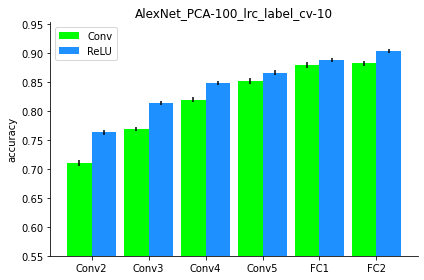

In [ ]:
import numpy as np
from os.path import join as pjoin
from scipy.stats import sem
from matplotlib import pyplot as plt

data_dir = 'AlexNet_PCA-100_lrc_label_cv-10'

# prepare layer names
layer_groups = [
    ['conv2', 'conv3', 'conv4', 'conv5', 'fc1', 'fc2'],
    ['conv2_relu', 'conv3_relu', 'conv4_relu', 'conv5_relu', 'fc1_relu', 'fc2_relu']]
n_row = len(layer_groups)
n_col = len(layer_groups[0])

# calculate mean and SEM
ys = np.zeros((n_row, n_col))
ys_err = np.zeros((n_row, n_col))
for row_idx, layers in enumerate(layer_groups):
    for col_idx, layer in enumerate(layers):
        scores = np.load(pjoin(data_dir, layer, 'score.npy')).squeeze()
        ys[row_idx, col_idx] = np.mean(scores)
        ys_err[row_idx, col_idx] = sem(scores)

# plot
plt.figure(figsize=(6, 4))
x = np.arange(n_col)
width = 0.43
plt.bar(x - width/2, ys[0], width, yerr=ys_err[0], color='lime', label='Conv')
plt.bar(x + width/2, ys[1], width, yerr=ys_err[1], color='dodgerblue', label='ReLU')
plt.ylim(0.55)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title(data_dir)
plt.xticks(x, ['Conv2', 'Conv3', 'Conv4', 'Conv5', 'FC1', 'FC2'])
plt.ylabel('accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
!zip -r /content/dnnbrain/tutorial.zip /content/dnnbrain/tutorial

  adding: content/dnnbrain/tutorial/ (stored 0%)
  adding: content/dnnbrain/tutorial/probe_dnn/ (stored 0%)
  adding: content/dnnbrain/tutorial/probe_dnn/AlexNet_relu1.act.h5 (deflated 0%)
  adding: content/dnnbrain/tutorial/probe_dnn/AlexNet7.act.h5 (deflated 0%)
  adding: content/dnnbrain/tutorial/probe_dnn/AlexNet_relu2.act.h5 (deflated 0%)
  adding: content/dnnbrain/tutorial/probe_dnn/AlexNet3.act.h5 (deflated 0%)
  adding: content/dnnbrain/tutorial/probe_dnn/AlexNet_relu4.act.h5 (deflated 0%)
  adding: content/dnnbrain/tutorial/probe_dnn/AlexNet_relu6.act.h5 (deflated 0%)
  adding: content/dnnbrain/tutorial/probe_dnn/AlexNet5.act.h5 (deflated 0%)
  adding: content/dnnbrain/tutorial/probe_dnn/AlexNet_relu5.act.h5 (deflated 0%)
  adding: content/dnnbrain/tutorial/probe_dnn/AlexNet_relu7.act.h5 (deflated 0%)
  adding: content/dnnbrain/tutorial/probe_dnn/AlexNet2.act.h5 (deflated 0%)
  adding: content/dnnbrain/tutorial/probe_dnn/AlexNet_PCA-100_lrc_label_cv-10/ (stored 0%)
  adding: c

In [ ]:
from google.colab import files
files.download("/content/dnnbrain/tutorial.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
#visualize dnn
%cd visualize_dnn


/content/dnnbrain/tutorial/visualize_dnn


In [12]:
!dnn_topstim -net AlexNet -top 3 -stim all_5000scenes.stim.csv -layer fc3 -chn 10 85 131 -cuda -out .

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Extracted activation of fc3: 8/4916
Extracted activation of fc3: 16/4916
Extracted activation of fc3: 24/4916
Extracted activation of fc3: 32/4916
Extracted activation of fc3: 40/4916
Extracted activation of fc3: 48/4916
Extracted activation of fc3: 56/4916
Extracted activation of fc3: 64/4916
Extracted activation of fc3: 72/4916
Extracted activation of fc3: 80/4916
Extracted activation of fc3: 88/4916
Extracted activation of fc3: 96/4916
Extracted activation of fc3: 104/4916
Extracted activation of fc3: 112/4916
Extracted activation of fc3: 120/4916
Extracted activation of fc3: 128/4916
E

In [ ]:
!dnn_saliency -net AlexNet -layer fc3 -chn 10 -stim fc3_chn10_top3.stim.csv -meth guided -mode RGB -out .

Fatal Python error: init_sys_streams: can't initialize sys standard streams
AttributeError: module 'io' has no attribute 'OpenWrapper'

Current thread 0x00007ff44c67c780 (most recent call first):


In [ ]:
!dnn_saliency -net AlexNet -layer fc3 -chn 85 -stim fc3_chn85_top3.stim.csv -meth guided -mode RGB -out .

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Finish: 3/3


In [ ]:
!dnn_saliency -net AlexNet -layer fc3 -chn 131 -stim fc3_chn131_top3.stim.csv -meth guided -mode RGB -out .

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Finish: 3/3


In [ ]:
!cp -RT /content/dnnbrain/dnnbrain /content/dnnbrain

In [ ]:
from dnnbrain.dnn.models import AlexNet
from dnnbrain.dnn.algo import SynthesisImage
from dnnbrain.dnn.base import ip

dnn = AlexNet()
synthesis = SynthesisImage(dnn)

# synthesize ostrich stimulus
synthesis.set_layer('fc3', 10)
synthesis.set_loss('mean', 'TV', 0.1)
img_out = synthesis.synthesize(lr=1.0, n_iter=500)
img_out = ip.to_pil(img_out, True)
img_out.save('synthesized_ostrich.jpg')

# synthesize peacock stimulus
synthesis.set_layer('fc3', 85)
synthesis.set_loss('mean', 'TV', 0.05)
img_out = synthesis.synthesize(lr=2.5, n_iter=500)
img_out = ip.to_pil(img_out, True)
img_out.save('synthesized_peacock.jpg')

# synthesize flamingo stimulus
synthesis.set_layer('fc3', 131)
synthesis.set_loss('mean', 'TV', 0.1)
img_out = synthesis.synthesize(lr=1.0, n_iter=500)
img_out = ip.to_pil(img_out, True)
img_out.save('synthesized_flamingo.jpg')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Iteration: 1/500; Loss: 10030.7919921875
Iteration: 2/500; Loss: 32782.67578125
Iteration: 3/500; Loss: 34270.61328125
Iteration: 4/500; Loss: 24319.0234375
Iteration: 5/500; Loss: 21824.87109375
Iteration: 6/500; Loss: 20879.904296875
Iteration: 7/500; Loss: 18118.27734375
Iteration: 8/500; Loss: 16254.3193359375
Iteration: 9/500; Loss: 15949.3583984375
Iteration: 10/500; Loss: 15588.232421875
Iteration: 11/500; Loss: 14198.6376953125
Iteration: 12/500; Loss: 12729.318359375
Iteration: 13/500; Loss: 11822.9150390625
Iteration: 14/500; Loss: 11353.1376953125
Iteration: 15/500; Loss: 10826.8466796875
Iteration: 16/500; Loss: 10172.109375
Iteration: 17/500; Loss: 9557.068359375
Iteration: 18/500; Loss: 9033.5654296875
Iteration: 19/500; Loss: 8583.32421875
Iteration: 20/500; Loss: 8167.4267578125
Iteration: 21/500; Loss: 7807.7568359375
Iteration: 22/500; Loss: 7443.5830078125
Iteration: 23/500; Loss: 7101.4853515625
Iteration: 24/500; Loss: 6789.40673828125
Iteration: 25/500; Loss: 6540

In [ ]:
%cd /content/dnnbrain
!rm -r brain dnn io utils viz __init__.py

In [ ]:
%cd saliency_maps


[Errno 2] No such file or directory: 'saliency_maps'
/content/dnnbrain/tutorial/minimal_image


In [ ]:
!cp -RT /content/dnnbrain/dnnbrain /content/dnnbrain


In [ ]:
 #vanilla saliency image

import numpy as np

from PIL import Image
from dnnbrain.dnn.base import ip
from dnnbrain.dnn.models import AlexNet
from dnnbrain.dnn.algo import VanillaSaliencyImage

# Prepare DNN and image
dnn = AlexNet()
image = Image.open('tiger.jpeg')

# Get the vanilla saliency image of the image
# which displays the saliency parts that contribute to
# the activation of the 540th unit of fc3.
vanilla = VanillaSaliencyImage(dnn)
vanilla.set_layer('fc3', 540)
img_out = np.abs(vanilla.backprop(image))

# transform to PIL image and save out
img_out = ip.to_pil(img_out, True)
img_out.save('tiger_vanilla_saliency.JPEG')

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
# guided saliency image

import numpy as np

from PIL import Image
from dnnbrain.dnn.base import ip
from dnnbrain.dnn.models import AlexNet
from dnnbrain.dnn.algo import GuidedSaliencyImage

# Prepare DNN and image
dnn = AlexNet()
image = Image.open('tiger.jpeg')

# Get the guided saliency image of the image
# which displays the saliency parts that contribute to
# the activation of the 540th unit of fc3.
guided = GuidedSaliencyImage(dnn)
guided.set_layer('fc3', 540)
img_out = np.abs(guided.backprop(image))

# transform to PIL image and save out
img_out = ip.to_pil(img_out, True)
img_out.save('tiger_guided_saliency.JPEG')

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


In [ ]:
#Extending vanilla saliency image to random color inputs
%cd /content/dnnbrain/tutorial/colors


import numpy as np

from PIL import Image
from dnnbrain.dnn.base import ip
from dnnbrain.dnn.models import AlexNet
from dnnbrain.dnn.algo import VanillaSaliencyImage

# Prepare DNN and image
dnn = AlexNet()
image = Image.open('white.jpg')

# Get the vanilla saliency image of the image
# which displays the saliency parts that contribute to
# the activation of the 540th unit of fc3.
vanilla = VanillaSaliencyImage(dnn)
vanilla.set_layer('fc3', 540)
img_out = np.abs(vanilla.backprop(image))

# transform to PIL image and save out
img_out = ip.to_pil(img_out, True)
img_out.save('white_vanilla_saliency.JPEG')

/content/dnnbrain/tutorial/colors


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


In [ ]:
#Extending guided saliency image to random color inputs
%cd /content/dnnbrain/tutorial/colors

import numpy as np

from PIL import Image
from dnnbrain.dnn.base import ip
from dnnbrain.dnn.models import AlexNet
from dnnbrain.dnn.algo import GuidedSaliencyImage

# Prepare DNN and image
dnn = AlexNet()
image = Image.open('orange.jpg')

# Get the guided saliency image of the image
# which displays the saliency parts that contribute to
# the activation of the 540th unit of fc3.
guided = GuidedSaliencyImage(dnn)
guided.set_layer('fc3', 540)
img_out = np.abs(guided.backprop(image))

# transform to PIL image and save out
img_out = ip.to_pil(img_out, True)
img_out.save('orange_guided_saliency.jpg')

/content/dnnbrain/tutorial/colors


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


In [ ]:
%cd /content/dnnbrain
!rm -r brain dnn io utils viz __init__.py

/content/dnnbrain


In [ ]:
# Synthesize Optimal image

%cd /content/dnnbrain/tutorial
!mkdir synthesize_image
%cd synthesize_image

/content/dnnbrain/tutorial
mkdir: cannot create directory ‘synthesize_image’: File exists
/content/dnnbrain/tutorial/synthesize_image


In [ ]:
import os
from os.path import join as pjoin
from dnnbrain.dnn.models import AlexNet
from dnnbrain.dnn.algo import SynthesisImage
from dnnbrain.dnn.base import ip

# 0: Folds preparation
path = os.getcwd()

# 1:Parameter Set
# 1.1 prepare target channel
    #First save your target channel in variable
layer = 'fc3'
chn = 131

# 1.2 method
    # Next you can choose metrics for synthesizing,
    # you must decide how to compute the activation in 1.2.1
    # and for those in 1.2.2-1.2.4, they are optimal method
    # you can choose only one or combinations of many
    # which depends on your purpose and image quality.

# 1.2.1 How to compute
    # Because channels in convolutional layers has more
    # than one activation value, we provide mean and max
    # to compute the activation loss function of activation
    # map, but for fully-connected(fc) layers, the activation
    # map only has one activation.
act_meth = 'mean'

# 1.2.2 Regularization
    # Loss function =  - activation + regularization
    # where activation is the mean or max of the channel
    # and regularization constraint additional requirement
    # on the image, usually dealing with outliers in pixels.
reg_meth = 'TV' # Method name: total variance
reg_lambda = 0.01

# 1.2.3 Image Precondition
    # This type of metrics processes the whole image in every
    # iteration, often blur the image to mitigate high frequency.
pre_meth = 'GB' # Method name: gaussian blur
GB_radius = 0.3

# 1.2.4 Gradient Smooth
    # Gradient smooth works by smooth the gradient of activation,
    # gradient determines the output of image in every iteration.

sm_meth = 'Fourier' # Method name: Fourier filter
factor = 0.3

#2: Synthesize

#Get Network
dnn = AlexNet()

#prepare parameters of optimizer
lr = 0.1 #learning rate
n_iter = 150 # number of iterations

#create instance of SynthesisImage
synthesis = SynthesisImage(dnn)

#Set layer & channel
synthesis.set_layer(layer, chn)

#Set metric parameters
    # Note if you don't use some optimal ones,
    # you need to give 'None' value,
    # here we only adopt smooth_metric
    # but all the metrics should be set
synthesis.set_loss(activ_metric='mean', regular_metric=reg_meth,regular_lambda=reg_lambda)
synthesis.set_precondition(precondition_metric=pre_meth,GB_radius=GB_radius)
synthesis.set_smooth_gradient(smooth_metric=sm_meth, factor=factor)

#start synthesize
    # In this example you can omit init_image & unit if not necessary.
        # Parameter verbose is for loss printing, save_path & save_step is for interval image saving,
        # if save_path has an input but save_step is none, only the final image will be stored out.

# Save interval images in iteration
save_out_path = path
save_step = 10 # every 10 iteration save one
# Print during iteration
print_inter_loss = True

optimal_img = synthesis.synthesize(init_image=None, unit=None, lr=lr, n_iter=n_iter, verbose=print_inter_loss, save_path=save_out_path, save_step=save_step)

# Save final images
# name the image path
file_name = f'optimal_{layer}_chn{chn}.png'
file_path = pjoin(path, file_name)
# transfer to Image
img_out = ip.to_pil(optimal_img, True)
# save in the current dir
img_out.save(file_path)
# you will see the png in your current path

AttributeError: ignored

In [14]:
# Minimal image
%cd /content/dnnbrain/tutorial
!mkdir minimal_image
%cd minimal_image

/content/dnnbrain/tutorial
/content/dnnbrain/tutorial/minimal_image


In [19]:
!echo -e "type=image" > colors.stim.csv
!echo -e "path=/content/dnnbrain/tutorial/colors" >> colors.stim.csv
!echo -e "data=stimID" >> colors.stim.csv
!echo -e "orange.jpg" >> colors.stim.csv
!echo -e "blue.jpg" >> colors.stim.csv
!echo -e "cyan.jpg" >> colors.stim.csv
!echo -e "tiger.jpeg" >> colors.stim.csv

In [20]:
!dnn_saliency -net AlexNet -layer fc3 -chn 294 23 -stim colors.stim.csv -mode gray -cmap gray -out .

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Finish: 4/4


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from dnnbrain.dnn.base import ip
from dnnbrain.dnn.models import AlexNet
from dnnbrain.dnn.algo import MinimalParcelImage

# Prepare DNN and image
dnn = AlexNet()
image = plt.imread('ILSVRC_val_00095233.jpg')

# Generate minimal image using felzenszwalb method
# which cause almost equivalent activation as
# the raw stimlus' activation of the 122th unit of conv5.
img_min = MinimalParcelImage(dnn, 'conv5', 122)
img_min.felzenszwalb_decompose(image)
img_out = img_min.generate_minimal_image()

# transform to PIL image and save out
img_out = ip.to_pil(img_out.transpose(2,0,1), True)
img_out.save('ILSVRC_val_00095233.JPEG_min.JPEG')

Extracted activation of conv5: 8/339
Extracted activation of conv5: 16/339
Extracted activation of conv5: 24/339
Extracted activation of conv5: 32/339
Extracted activation of conv5: 40/339
Extracted activation of conv5: 48/339
Extracted activation of conv5: 56/339
Extracted activation of conv5: 64/339
Extracted activation of conv5: 72/339
Extracted activation of conv5: 80/339
Extracted activation of conv5: 88/339
Extracted activation of conv5: 96/339
Extracted activation of conv5: 104/339
Extracted activation of conv5: 112/339
Extracted activation of conv5: 120/339
Extracted activation of conv5: 128/339
Extracted activation of conv5: 136/339
Extracted activation of conv5: 144/339
Extracted activation of conv5: 152/339
Extracted activation of conv5: 160/339
Extracted activation of conv5: 168/339
Extracted activation of conv5: 176/339
Extracted activation of conv5: 184/339
Extracted activation of conv5: 192/339
Extracted activation of conv5: 200/339
Extracted activation of conv5: 208/339

In [ ]:
#!dnn_topstim -net AlexNet -top 3 -stim examples.stim.csv -layer conv5 -chn 1 2 3 -out .

In [ ]:
#!echo -e "type=image" > examples.stim.csv
#!echo -e "path=/content/dnnbrain/data/Presented_Stimuli/ImageNet" >> examples.stim.csv
#!echo -e "data=stimID" >> examples.stim.csv
#!echo -e "n02130308_9559.JPEG" >> examples.stim.csv
#!echo -e "n03255030_4054.JPEG" >> examples.stim.csv
#!echo -e "n01614925_407.JPEG" >> examples.stim.csv

In [ ]:
#!dnn_saliency -net AlexNet -layer fc3 -chn 294 23 -stim examples.stim.csv -show

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
<Figure size 1000x600 with 9 Axes>
Finish: 3/3


In [ ]:
#!dnn_saliency -net AlexNet -layer fc3 -chn 294 23 -stim examples.stim.csv -mode gray -cmap gray -out .

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Finish: 3/3
